In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

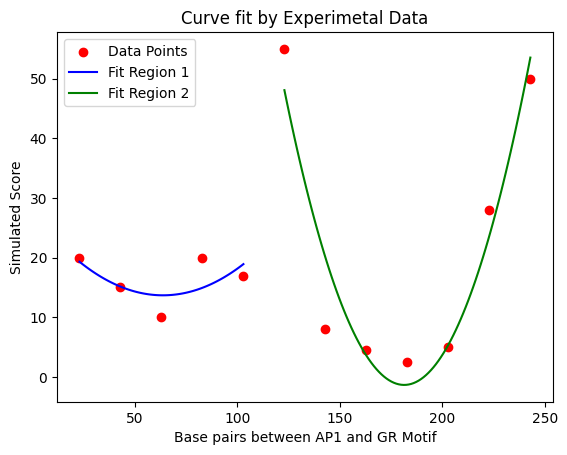

(array([ 3.39285714e-03, -4.32500000e-01,  2.74669643e+01]),
 array([ 1.44791666e-02, -5.25383925e+00,  4.75250250e+02]))

In [3]:
# use the data in Dr Vockley's experiment to fit target function


def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

x_data = np.array([23, 43, 63, 83, 103, 123, 143, 163, 183, 203, 223, 243])
y_data = np.array([20, 15, 10, 20, 17, 55, 8, 4.5, 2.5, 5, 28, 50])

def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

# Split data into two regions based on visual observation
split_index = 5  # Dividing around the 6th data point
x1, y1 = x_data[:split_index], y_data[:split_index]
x2, y2 = x_data[split_index:], y_data[split_index:]

# Fit quadratic function to both regions
params1, _ = curve_fit(quadratic, x1, y1)
params2, _ = curve_fit(quadratic, x2, y2)

# Generate smooth x values for plotting the curves
x1_fit = np.linspace(min(x1), max(x1), 100)
y1_fit = quadratic(x1_fit, *params1)
x2_fit = np.linspace(min(x2), max(x2), 100)
y2_fit = quadratic(x2_fit, *params2)

# Plot the data and the fitted curves
plt.scatter(x_data, y_data, color='red', label='Data Points')
plt.plot(x1_fit, y1_fit, color='blue', label='Fit Region 1')
plt.plot(x2_fit, y2_fit, color='green', label='Fit Region 2')
plt.xlabel('Base pairs between AP1 and GR Motif')
plt.ylabel('Simulated Score')
plt.legend()
plt.title('Curve fit by Experimetal Data')
plt.show()

# Output fitted parameters for both regions
params1, params2

In [ ]:
func1 = 0.034*x^2-0.43*x+27.50
func2 = 0.014*x^2-5.25*x+475.25

In [21]:
1.44791666e-02, -5.25383925e+00,  4.75250250e+02

(0.0144791666, -5.25383925, 475.25025)

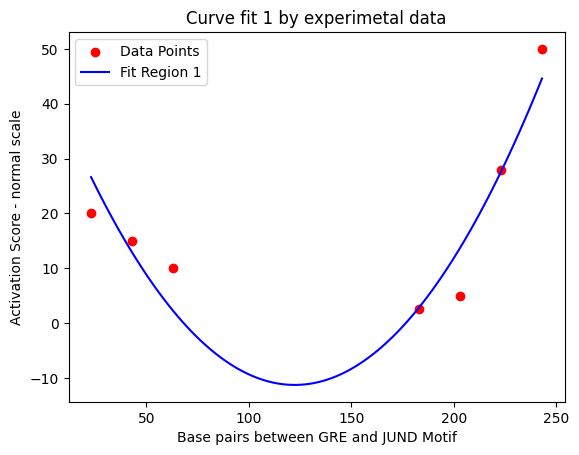

array([ 3.83942702e-03, -9.39553441e-01,  4.61986242e+01])

In [4]:
# use the data in Dr Vockley's experiment to fit target function - 3 on left and 4 on right
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


x_data = np.array([23, 43, 63, 183, 203, 223, 243])
y_data = np.array([20, 15, 10, 2.5, 5, 28, 50])

def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

# Fit quadratic function to both regions
params1, _ = curve_fit(quadratic, x_data, y_data)

# Generate smooth x values for plotting the curves
x1_fit = np.linspace(min(x_data), max(x_data), 100)
y1_fit = quadratic(x1_fit, *params1)


# Plot the data and the fitted curves
plt.scatter(x_data, y_data, color='red', label='Data Points')
plt.plot(x1_fit, y1_fit, color='blue', label='Fit Region 1')
plt.xlabel('Base pairs between GRE and JUND Motif')
plt.ylabel('Activation Score - normal scale')
plt.legend()
plt.title('Curve fit 1 by experimetal data')
plt.show()

# Output fitted parameters for both regions
params1

/tmp/ipykernel_2629082/471515583.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(quadratic, x_data, y_data)


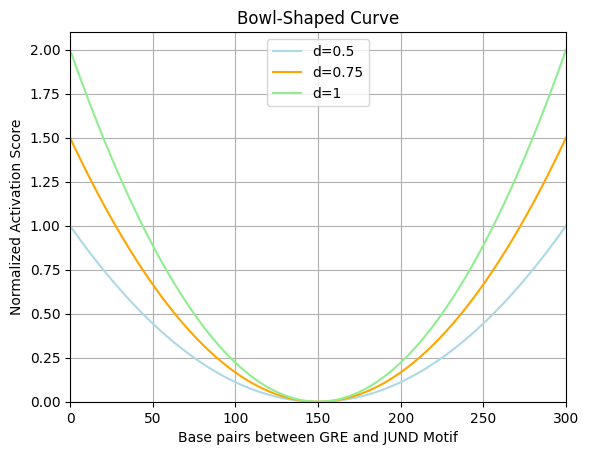

array([ 8.88888889e-05, -2.66666667e-02,  2.00000000e+00])

In [29]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([0,150,300])
y_data = np.array([2,0,2])


def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

params, _ = curve_fit(quadratic, x_data, y_data)  

def adjust_depth(x, a, b, c, d):
    return d * (a * x**2 + b * x + c)

x = np.linspace(0, 300, 300)
y1 = adjust_depth(x, *params, d=0.5)
y2 = adjust_depth(x, *params, d=0.75)
y3 = adjust_depth(x, *params, d=1)



plt.plot(x, y1, label='d=0.5', color='lightblue')
plt.plot(x, y2, label='d=0.75', color='orange')
plt.plot(x, y3, label='d=1', color='lightgreen')
plt.xlabel('Base pairs between GRE and JUND Motif')
plt.ylabel('Normalized Activation Score')
plt.title('Bowl-Shaped Curve')
plt.ylim(0, 2.1)
plt.xlim(0, 300)
plt.grid(True)
plt.legend()
plt.show()

params1

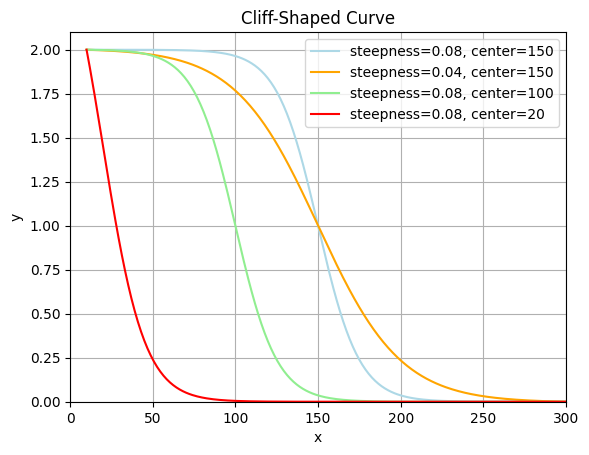

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(10, 300, 300)     

def cliff_curve(x, center, steepness, direction):
    # y = 2/(1+exp(steepness*direction*(x-center)))
    y = 1 / (1 + np.exp(direction * steepness * (x - center)))
    y_scaled = 2 * (y - np.min(y)) / (np.max(y) - np.min(y))
    return y_scaled

plt.plot(x, cliff_curve(x, center=150, steepness=0.08, direction=1), label='steepness=0.08, center=150', color='lightblue')
plt.plot(x, cliff_curve(x, center=150, steepness=0.04, direction=1), label='steepness=0.04, center=150', color='orange')
plt.plot(x, cliff_curve(x, center=100, steepness=0.08, direction=1), label='steepness=0.08, center=100', color='lightgreen')
plt.plot(x, cliff_curve(x, center=20, steepness=0.08, direction=1), label='steepness=0.08, center=20', color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Cliff-Shaped Curve')
plt.ylim(0, 2.1)
plt.xlim(0, 300)
plt.grid(True)
plt.legend()
plt.show()


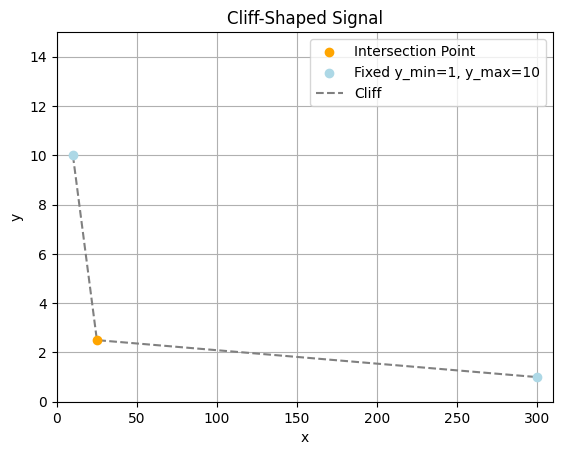


Line Equations:
Left Line:  y = -0.5000 * x + 15.0000
Right Line: y = -0.0055 * x + 2.6364


In [3]:
def cliff_activation(y_max: float = 10,
                     y_min: float = 1,
                     x_intersection: float = 150,
                     y_intersection: float = 1.0,
                     x_min: float = 10,
                     x_max: float = 300):

    if not (x_min < x_intersection < x_max):
        raise ValueError(f"x_intersection must be in ({x_offset}, 300). Got {x_intersection}")
    if not (y_min < y_intersection < y_max):
        raise ValueError(f"y_intersection must be in ({y_min}, {y_max}). Got {y_intersection}")
        
    x = np.linspace(x_min, x_max, 300) 
    x1, y1 = x_min, y_max
    x2, y2 = x_max, y_min

    k1 = (y_intersection - y1) / (x_intersection - x1)  
    k2 = (y2 - y_intersection) / (x2 - x_intersection)

    y = np.zeros_like(x)

    left_mask = x <= x_intersection
    right_mask = x > x_intersection

    y[left_mask] = y1 + k1 * (x[left_mask] - x1)
    y[right_mask] = y_intersection + k2 * (x[right_mask] - x_intersection)

    k1 = (y_max - y_intersection)/(x_min - x_intersection)
    b1 = y_max - x_min * k1
    k2 = (y_intersection - y_min)/(x_intersection - x_max)
    b2 = y_intersection - x_intersection * k2

    return x, y, k1, k2, b1, b2
    
x_min = 10  
x_max = 300
y_max = 10
y_min = 1
x_intersection = 25
y_intersection = 2.5

x, y, k1, k2, b1, b2 = cliff_activation(x_intersection=x_intersection, y_intersection=y_intersection, x_min=x_min, x_max=x_max)

plt.scatter(x_intersection, y_intersection, color='orange', zorder=5, label='Intersection Point')
plt.scatter([x_min, x_max], [y_max, y_min], color='lightblue', zorder=5, label=f'Fixed y_min={y_min}, y_max={y_max}')
plt.plot([x_min, x_intersection, x_max], [y_max, y_intersection, y_min], linestyle='--', color='gray', label='Cliff')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Cliff-Shaped Signal')
plt.grid(True)
plt.legend()
plt.ylim(0, y_max*1.5)
plt.xlim(0, 310)
plt.show()

print("\nLine Equations:")
print(f"Left Line:  y = {k1:.4f} * x + {b1:.4f}")

print(f"Right Line: y = {k2:.4f} * x + {b2:.4f}")



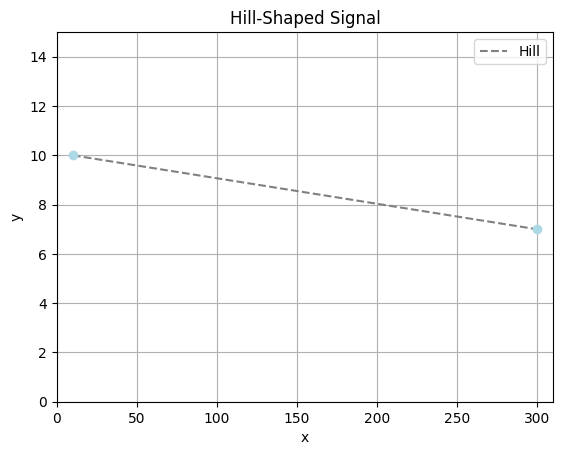


Line Equations:
y = -0.0103 * x + 10.1034


In [7]:
def hill_activation(y_max: float = 10,
                 y_min: float = 1, 
                 x_min: float = 10,
                 x_max: float = 300):

    if not (y_min < y_max):
        raise ValueError(f"y_min must be less than {y_max}. Got {y_min}")
        
    x = np.linspace(x_min, x_max, 300) 
    k = (y_max - y_min)/(x_min - x_max)
    b = y_max - x_min * k
    y = x * k + b

    return x, y, k, b
    
x_min = 10  
x_max = 300
y_max = 10
y_min = 7


x, y, k, b = hill_activation(y_min = y_min)

plt.scatter([x_min, x_max], [y_max, y_min], color='lightblue', zorder=5)
plt.plot([x_min, x_max], [y_max, y_min], linestyle='--', color='gray', label='Hill')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Hill-Shaped Signal')
plt.grid(True)
plt.legend()
plt.ylim(0, y_max*1.5)
plt.xlim(0, 310)
plt.show()

print("\nLine Equations:")
print(f"y = {k:.4f} * x + {b:.4f}")


